# Propagation over irregular terrain


In [1]:
import os
os.chdir('../../../')
from rwp.antennas import GaussAntenna
from rwp.environment import *
from rwp.sspade import *
from rwp.vis import *

Preparing environment

In [2]:
environment = Troposphere()
environment.terrain = Terrain(
    elevation=gauss_hill_func(
        height_m=250,
        length_m=30E3,
        x0_m=50E3
    ),
    ground_material=WetGround()
)
elevated_duct = interp1d(
    x=[0, 100, 150, 300],
    y=[0, 32, 10, 45],
    fill_value="extrapolate")
environment.M_profile = lambda x, z: elevated_duct(z)

Preparing transmitting antenna

In [3]:
antenna = GaussAntenna(freq_hz=300E6,
                       height=30,
                       beam_width=2,
                       elevation_angle=0,
                       polarz='H')

Calculating the electromagnetic field

In [4]:
params = RWPSSpadeComputationalParams(
    max_range_m=100E3,
    max_height_m=500,
    dx_m = 100, # output grid steps affects only on the resulting field, NOT the computational grid
    dz_m = 1
)


field = rwp_ss_pade(antenna=antenna, env=environment, params=params)

Visualising results

In [5]:
vis300mhz = FieldVisualiser(field, env=environment, label='Pade + Transparent BC: 300 MHz', x_mult=1E-3)

Two dimensional distribution of the field amplitude

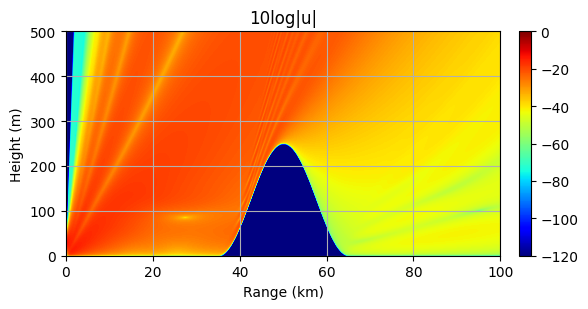

In [6]:
plt = vis300mhz.plot2d(min=-120, max=0)
plt.title('10log|u|')
plt.xlabel('Range (km)')
plt.ylabel('Height (m)')
plt.tight_layout()
plt.grid(True)
plt.show()

In [7]:
antenna = GaussAntenna(freq_hz=3E9,
                       height=30,
                       beam_width=2,
                       elevation_angle=0,
                       polarz='H')

In [ ]:
field = rwp_ss_pade(antenna=antenna, env=environment, params=params)

In [ ]:
vis3ghz = FieldVisualiser(field, env=environment, label='Pade + Transparent BC: 3 GHz', x_mult=1E-3)

In [ ]:
plt = vis3ghz.plot_hor(30, vis300mhz)
plt.xlabel('Range (km)')
plt.ylabel('10log|u| (dB)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
plt = vis3ghz.plot2d(min=-120, max=0)
plt.title('10log|u|')
plt.xlabel('Range (km)')
plt.ylabel('Height (m)')
plt.tight_layout()
plt.grid(True)
plt.show()